<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Sakti_Evaluasi_Model_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakti Kusuma Aji | 22.11.4677 | Tugas dipaling bawah

In [1]:
#import library
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
#create instance for load_breast_cancer
data_breast_cancer = load_breast_cancer()
#load dataset into dataframe
df_breast_cancer = pd.DataFrame(data = data_breast_cancer.data,
columns = data_breast_cancer.feature_names)
df_breast_cancer['target'] = data_breast_cancer.target
#show first 5 data
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
#ubah/simpan df_breast_cancer dengan nama cancer.csv
df_breast_cancer.to_csv('cancer.csv')

In [3]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
#split into X and y
X = data_breast_cancer.data
y = data_breast_cancer.target
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size :',X_test.shape)
print('y_test size :',y_test.shape)

X_train size : (455, 30)
y_train size : (455,)
X_test size : (114, 30)
y_test size : (114,)


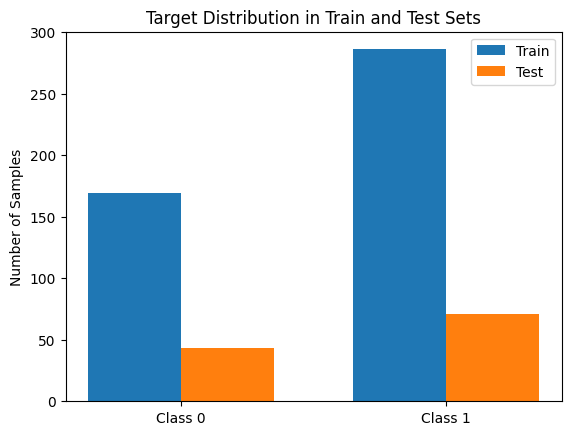

In [5]:
# Bentuk grafik hasil split datanyanya
import matplotlib.pyplot as plt
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test')
ax.set_ylabel('Number of Samples')
ax.set_title('Target Distribution in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

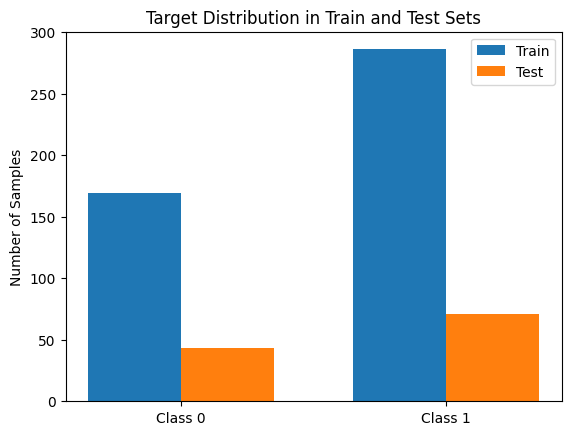

In [6]:
# Bentuk grafik hasil split datanyanya
import matplotlib.pyplot as plt
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test')
ax.set_ylabel('Number of Samples')
ax.set_title('Target Distribution in Train and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [7]:
from sklearn.naive_bayes import GaussianNB
# Training the Naive Bayes model on the Training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [8]:
predictions_nb = model_nb.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_nb, labels=model_nb.classes_)
print(cm)

[[40  3]
 [ 0 71]]


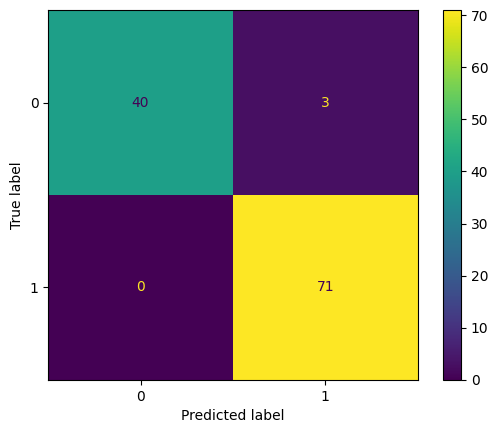

In [10]:
#confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=model_nb.classes_)

disp.plot()
plt.show()

In [11]:
#Menampilan total TP, FP, TN, FN berdasarkan ConfusionMatrix
cm = confusion_matrix(y_test, predictions_nb, labels=model_nb.classes_)
# Extract TP, FP, TN, FN from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

True Positive (TP): 71
False Positive (FP): 3
True Negative (TN): 40
False Negative (FN): 0


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy : ', accuracy_score(y_test, predictions_nb))

Accuracy :  0.9736842105263158


In [13]:
from sklearn.metrics import precision_score
print('Precision : ', precision_score(y_test, predictions_nb))

Precision :  0.9594594594594594


In [14]:
from sklearn.metrics import recall_score
print('Recall : ', recall_score(y_test, predictions_nb))

Recall :  1.0


In [15]:
from sklearn.metrics import f1_score
print('F1 Score : ', f1_score(y_test, predictions_nb))

F1 Score :  0.9793103448275862


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_nb, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
#import library
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
#create instance for load_breast_cancer
data_diabetes = load_diabetes()
#load dataset into dataframe
df_diabetes = pd.DataFrame(data = data_diabetes.data,
columns = data_diabetes.feature_names)
df_diabetes['target'] = data_diabetes.target
#show first 5 data
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [18]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [19]:
#split into X and y
X = data_diabetes.data
y = data_diabetes.target
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size :',X_test.shape)
print('y_test size :',y_test.shape)

X_train size : (353, 10)
y_train size : (353,)
X_test size : (89, 10)
y_test size : (89,)


In [20]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions_linreg = model_linreg.predict(X_test)

In [22]:
# Hasil predictions_linreg
import pandas as pd
predictions_df = pd.DataFrame(predictions_linreg, columns=['Predicted_Target'])
predictions_df

,Predicted_Target
0,139.547558
1,179.517208
2,134.038756
3,291.417029
4,123.789659
...,...
84,115.011800
85,78.955842
86,81.560873
87,54.379973


In [23]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MAE
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_linreg))

Mean Absolute Error: 42.79409467959994


In [26]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MAE
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predictions_linreg))

Mean Absolute Percentage Error: 0.3749982636756113


In [27]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MSE
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, predictions_linreg))

Mean Squared Error: 2900.193628493482


In [28]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai RMSE
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', np.sqrt(mean_absolute_error(y_test, predictions_linreg)))

Mean Absolute Error: 6.541719550668611


# Tugas

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [31]:
# Split dataset menjadi training dan testing set (80:20) dengan random_state=77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [32]:
# Inisialisasi model Naive Bayes
model = GaussianNB()

In [33]:
# Training model
model.fit(X_train, y_train)

GaussianNB()

In [34]:
# Prediksi pada data test
y_pred = model.predict(X_test)

In [35]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.94      0.96      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
 [[34  5]
 [ 3 72]]


# Penjelasan
Model Naive Bayes yang saya bangun menghasilkan akurasi sebesar 92,98%. Model ini memiliki performa yang baik dengan precision, recall, dan f1-score untuk kedua kelas (0 dan 1) yang cukup seimbang, masing-masing berada di kisaran 0,92 hingga 0,96. Untuk kelas 0, precision adalah 92%, recall 87%, dan f1-score 89%. Untuk kelas 1, precision adalah 94%, recall 96%, dan f1-score 95%. Dari confusion matrix, model mampu memprediksi sebagian besar sampel dengan benar, hanya terdapat beberapa kesalahan prediksi (5 untuk kelas 0 dan 3 untuk kelas 1). Secara keseluruhan, model ini memiliki kemampuan klasifikasi yang sangat baik dalam membedakan kedua kelas dengan akurasi yang tinggi dan metrik evaluasi yang konsisten.